In [9]:
####Importar librerías a ocupar
#Los chicos de siempre
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Algunos necesarios
import sklearn
import IPython
import sys
import mglearn

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import os
from scipy import signal
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer

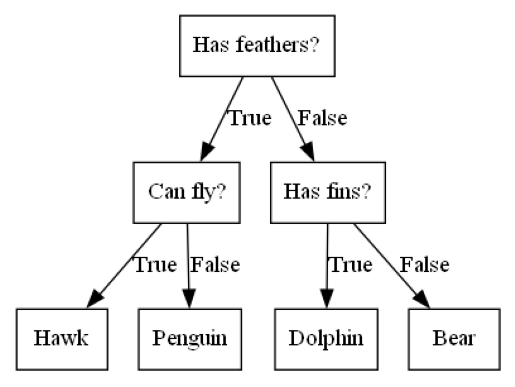

In [7]:
mglearn.plots.plot_animal_tree()

In [10]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [19]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


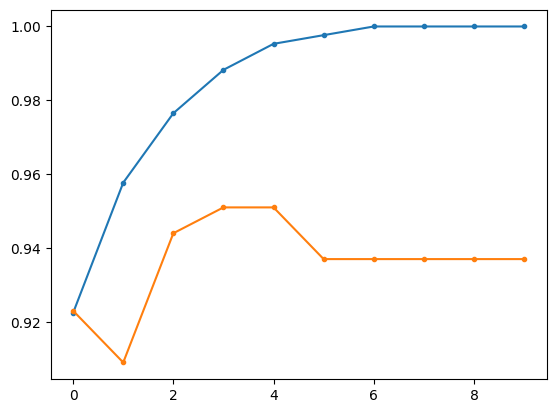

In [45]:
#nc = range[10]
i=0
TrainingT = []
SetScoreT= []
for x in list(range(10)) :
  Tree = DecisionTreeClassifier(max_depth=i+1, random_state=0)
  Tree.fit(X_train, y_train)
  TrainingT.append(Tree.score(X_train, y_train))
  SetScoreT.append(Tree.score(X_test, y_test))
  i =i+1
# The plot function makes a line chart of one array against another
plt.plot(list(range(10)),TrainingT, marker=".") + plt.plot(list(range(10)),SetScoreT, marker=".")

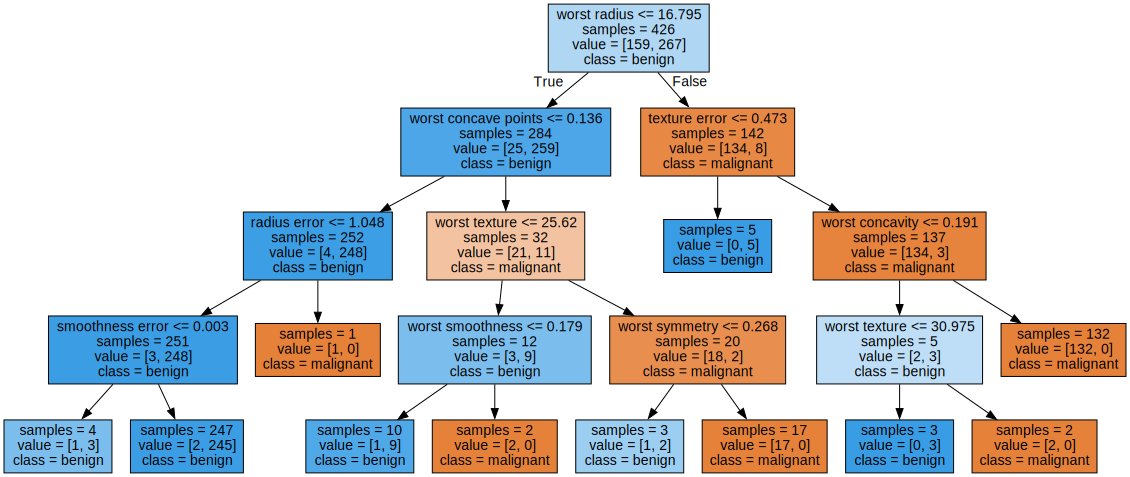

In [48]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

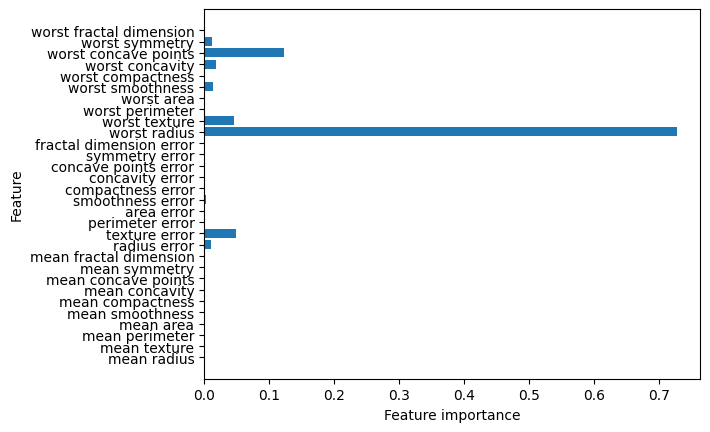

In [49]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


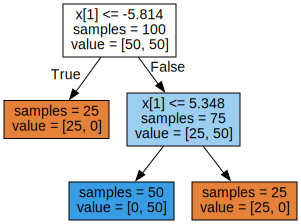

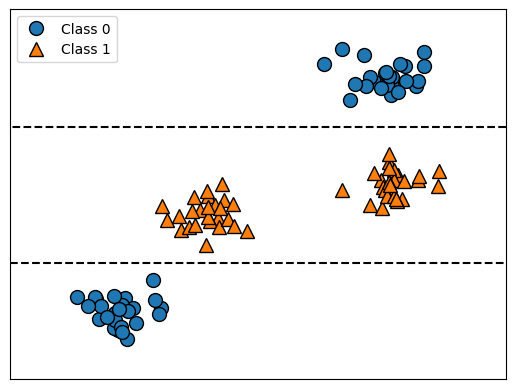

In [51]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

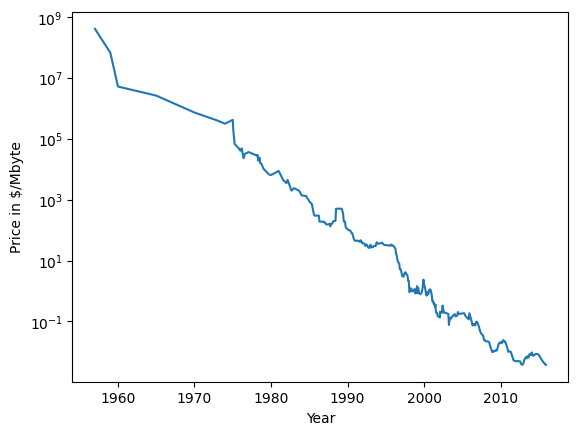

In [97]:
import pandas as pd
ram_prices = pd.read_csv("C:/Users/gusta/AppData/Local/Packages/PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0/LocalCache/local-packages/Python310/site-packages/mglearn/data/ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

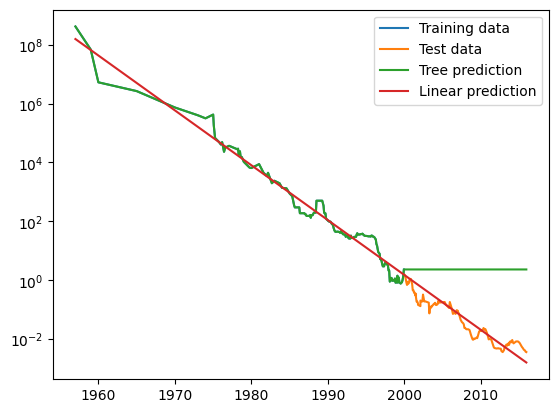

In [111]:
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
# predict prices based on date
#X_train = data_train.to_numpy["date"]

date_train = np.array(data_train['date'])
date_train_2d = date_train.reshape(-1, 1)
X_train = date_train_2d


# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
# predict on all data

#X_all = ram_prices.date[:, np.newaxis]

date_train_A = np.array(ram_prices['date'])
date_trainA_2d = date_train_A.reshape(-1, 1)
X_all = date_trainA_2d


pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (333,) and (202,)

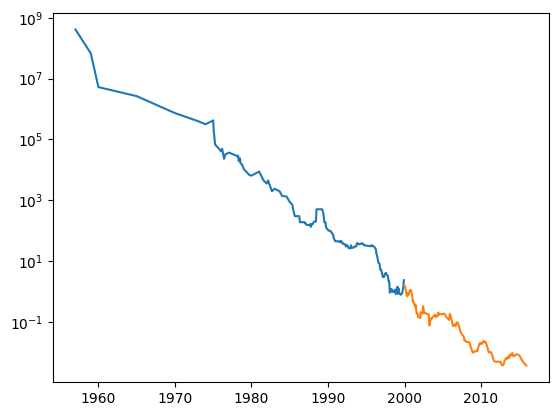